## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [3]:
# Load the dataset
bike_rental_df = pd.read_csv('/Users/youjia/Desktop/AML-github/aml-fall2023-assignment1-JessicaYoujiaLi/Data/bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

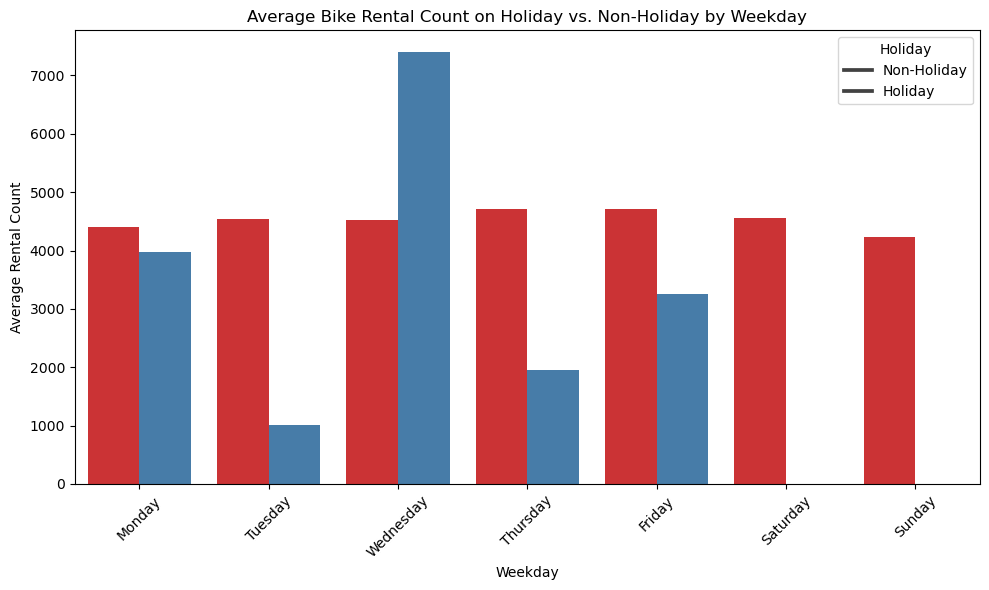

In [4]:
### Code here
df=pd.DataFrame(data = bike_rental_df)

# Group by 'weekday' and 'holiday' columns and calculate the mean rental count
avg_rentals = df.groupby(['weekday', 'holiday'])['count'].mean().reset_index()

#order by the weekday 
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='count', hue='holiday', data=avg_rentals, palette='Set1', order=weekday_order)
plt.title('Average Bike Rental Count on Holiday vs. Non-Holiday by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Rental Count')
plt.legend(title='Holiday', loc='upper right', labels=['Non-Holiday', 'Holiday'])
plt.xticks(rotation=45)
plt.tight_layout()

In [5]:
### Comment here
## From the bar chart above, it can be seen that the average number of bikes rented is higher in the non-holiday weekday than in holidays,
## which suggests that the bikes are more likely to be rented in the non-holiday weekday.

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month 
2. season
3. working_day
4. weather
<b></b>

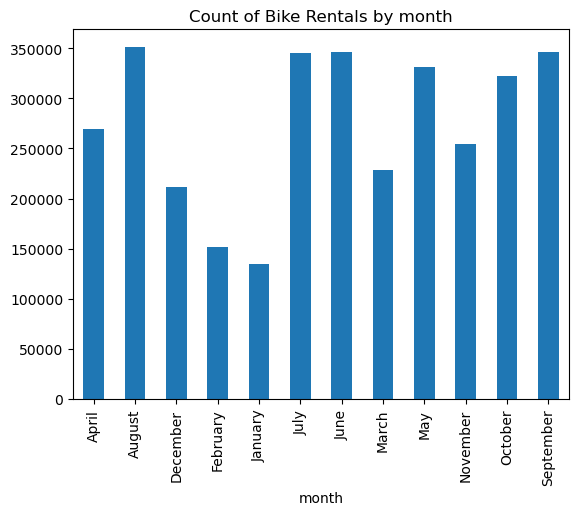

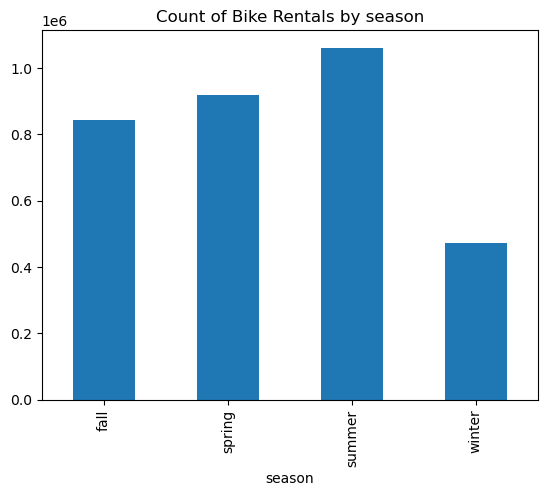

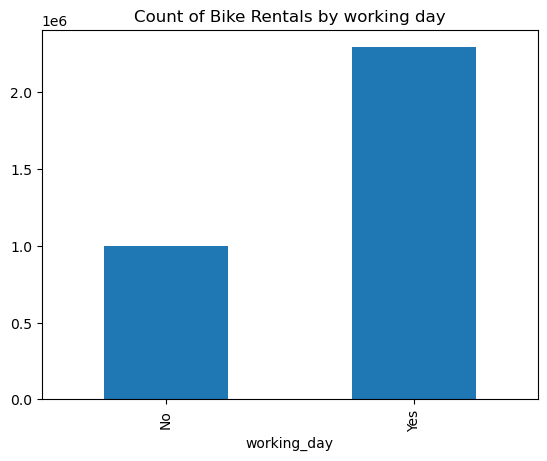

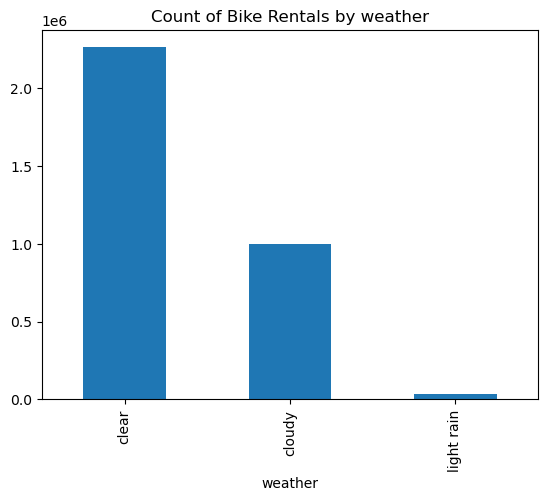

In [6]:
### Code here

Month_bike = df.groupby('month')['count'].sum()
plt.title('Count of Bike Rentals by month')
Month_bike.plot(kind = 'bar')
plt.show()

Season_bike = df.groupby('season')['count'].sum()
plt.title('Count of Bike Rentals by season')
Season_bike.plot(kind = 'bar')
plt.show()

Working_day_bike = df.groupby('working_day')['count'].sum()
plt.title('Count of Bike Rentals by working day')
Working_day_bike.plot(kind = 'bar')
plt.show()

weather_bike = df.groupby('weather')['count'].sum()
plt.title('Count of Bike Rentals by weather')
weather_bike.plot(kind = 'bar')
plt.show()

<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

Text(0.5, 1.0, 'Count of Bike Rentals by User Type in Each Month')

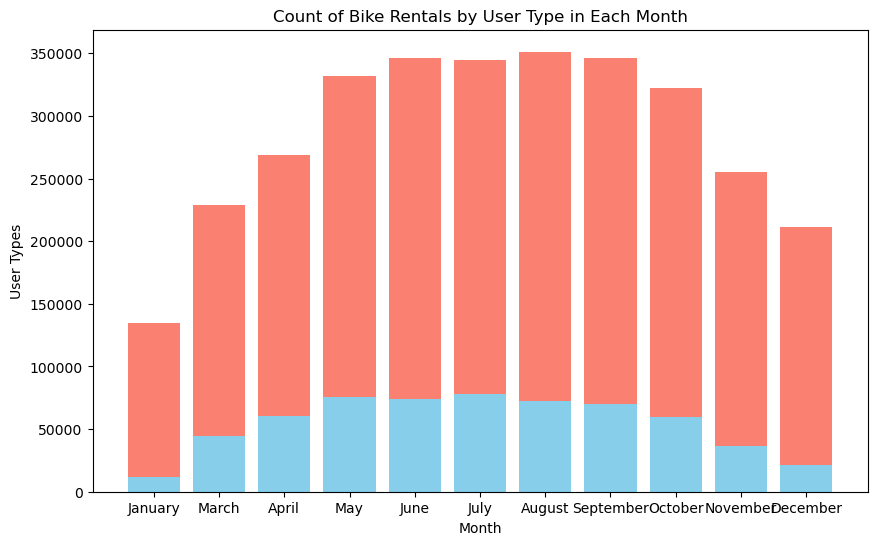

In [7]:
### Code here

month_order = ['January', 'Feburary', 'March', 'April', 'May', 'June','July','August','September','October','November','December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
groupby_MonthUser_df = df.groupby('month',observed=True).agg({'casual': 'sum', 'registered': 'sum'})

plt.figure(figsize=(10, 6)) 
plt.bar(groupby_MonthUser_df.index, groupby_MonthUser_df['casual'], label='Casual', color='skyblue')
plt.bar(groupby_MonthUser_df.index, groupby_MonthUser_df['registered'], bottom=groupby_MonthUser_df['casual'], color='salmon')
plt.xlabel('Month')
plt.ylabel('User Types')
plt.title('Count of Bike Rentals by User Type in Each Month')


<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

<Axes: title={'center': 'Windspeed v.s Count of Rental Bikes'}, xlabel='windspeed', ylabel='count'>

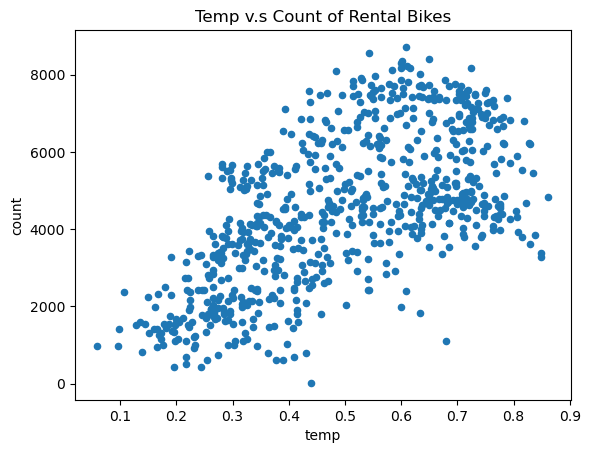

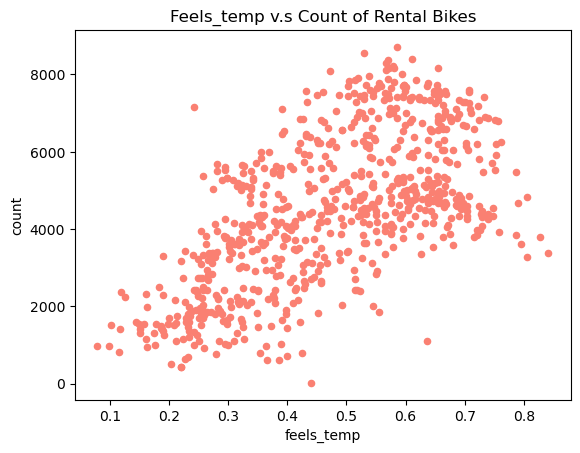

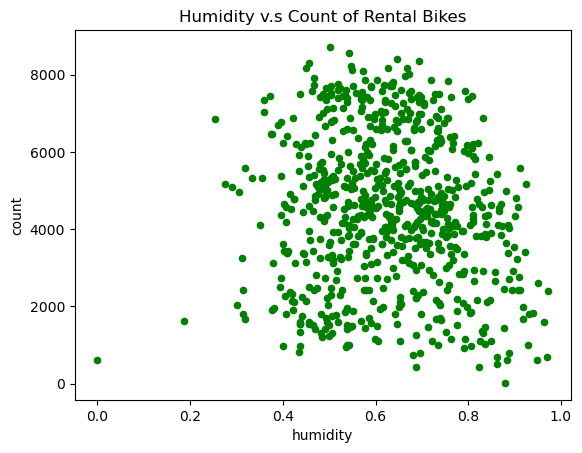

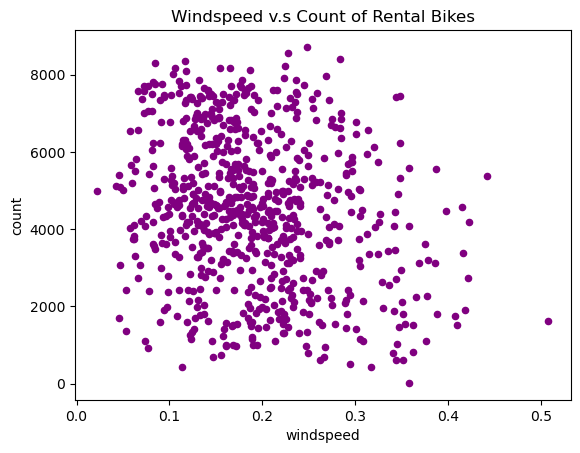

In [8]:
### Code here

df.plot.scatter(x='temp', y='count',title = 'Temp v.s Count of Rental Bikes')
df.plot.scatter(x='feels_temp', y='count',title = 'Feels_temp v.s Count of Rental Bikes', color = 'salmon')
df.plot.scatter(x='humidity', y='count',title = 'Humidity v.s Count of Rental Bikes', color = 'green')
df.plot.scatter(x='windspeed', y='count',title = 'Windspeed v.s Count of Rental Bikes', color = 'purple')

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time. 

In [9]:
# split data into features and labels
df.dropna(inplace=True)
bike_rental_X = df.drop(columns=['count'])
bike_rental_y = df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

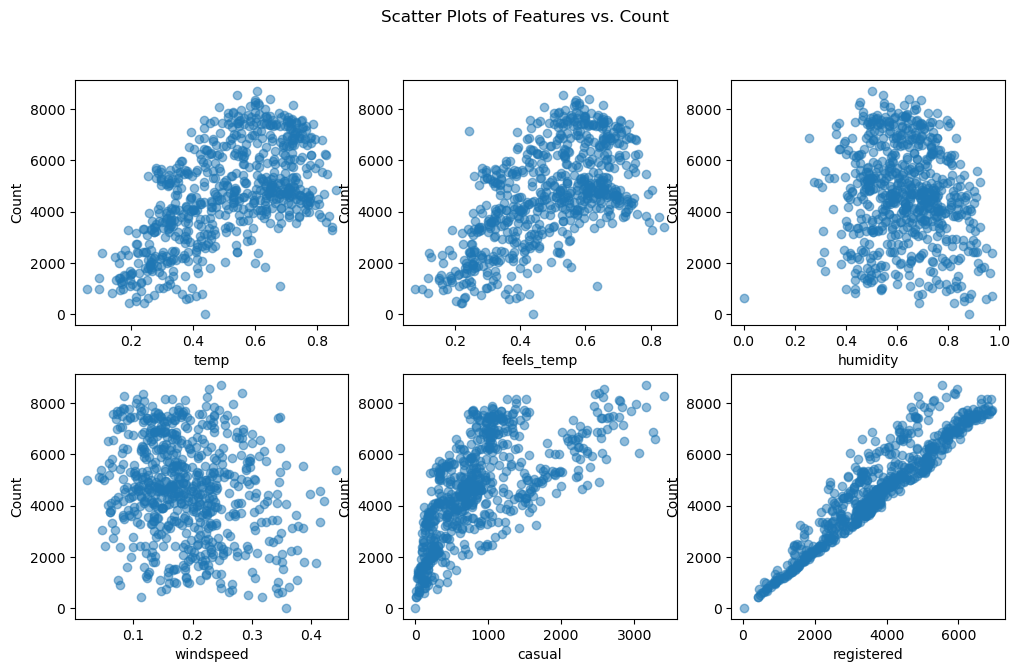

In [10]:
### Code here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
fig.suptitle('Scatter Plots of Features vs. Count')
features = ['temp', 'feels_temp', 'humidity', 'windspeed', 'casual', 'registered']

for i,feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].scatter(bike_rental_X[feature], bike_rental_y, alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [11]:
### Comment here

#I think linear regression will be a good model for this problem because for each scatter plot above it indicates linear relationship, 
#either positive or negative, between features and the target, and there aren't obvious outliers that might seriously impact the model, 
#so linear regression model can be a good choice for this problem 

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [12]:
### Code here

#Map months,season,weekday and weather to numerical values
month_to_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
bike_rental_X['month']=bike_rental_X['month'].map(month_to_num)

weekday_to_num = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}
bike_rental_X['weekday']=bike_rental_X['weekday'].map(weekday_to_num)

season_to_num = {
    "spring": 1,
    "summer": 2,
    "fall": 3,
    "winter": 4
}
bike_rental_X['season']=bike_rental_X['season'].map(season_to_num)

weather_to_num = {
    "cloudy": 0,
    "clear": 1,
    "light rain": 2,
}
bike_rental_X['weather']=bike_rental_X['weather'].map(weather_to_num)

categorical_variables = ['month','season','holiday','weekday','working_day','weather']
encoder = OrdinalEncoder()
bike_rental_X[categorical_variables] = encoder.fit_transform(df[categorical_variables])


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

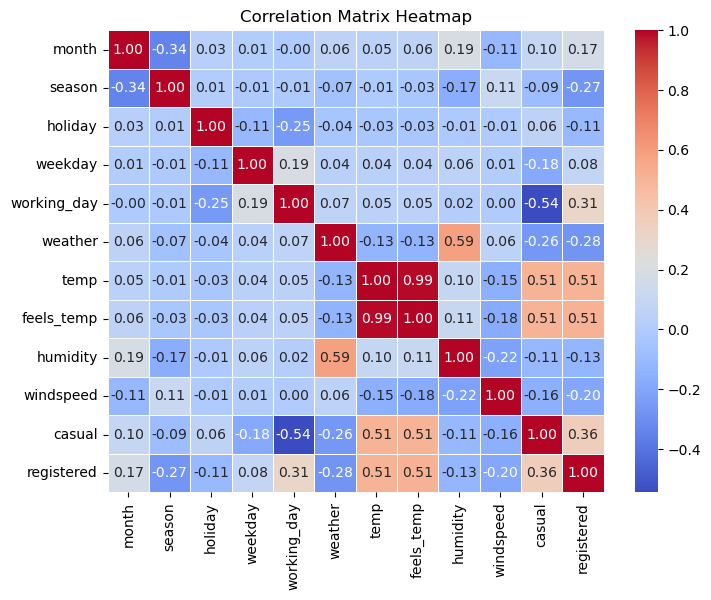

In [13]:
### Code here
#numerical_feature=['temp','feels_temp','humidity','windspeed']
correlation_matrix = bike_rental_X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

In [14]:
### Code here
#dropping feels_temp
bike_rental_X=bike_rental_X.drop(columns=['feels_temp'])

In [15]:
### Comment here

#The high correlation suggests multicolinearity, for which undermines the statistical significance of an independent variable since 
#it is highly correlated with another variable, and hence the accuracy of the model. 

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [16]:
### Code here

bike_rental_X=bike_rental_X.drop(columns=['casual','registered'])

#bike_rental_X

X_train, X_dev, bike_rental_y_train, y_dev = train_test_split(bike_rental_X,bike_rental_y ,test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

**2.1.6 Standardize the columns in the feature matrices.**

In [17]:
### Code here

#Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data to learn the mean and variance

# Use the fitted scaler to transform X_train, X_val, and X_test
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [18]:
#Adding a column of ones to the feature matrices for the bias term.

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


At the end of this pre-processing, you should have the following vectors and matrices: 
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [19]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        part_one = np.matmul(X.T,X)
        part_two = self.alpha * np.identity(X.shape[1])
        inverse_term = part_one + part_two
        part_three = np.matmul(X.T,y)
        self.w =np.linalg.solve(inverse_term,part_three)
        return None
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here

        y_pred =np.matmul(X,self.w) 
        return y_pred
        

### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [20]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.
    
    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [21]:
### Code here
linear_model = LinearRegression()

linear_model.train(X_train,bike_rental_y_train)
y_train_pre = linear_model.predict(X_train)
y_test_pre = linear_model.predict(X_test)
y_val_pre = linear_model.predict(X_val)

train_r2 = r2_score(bike_rental_y_train, y_train_pre)
val_r2 = r2_score(y_val,y_val_pre )
test_r2 = r2_score(y_test,y_test_pre)

print('train r^2:', train_r2, 'validation r^2:',val_r2,'test r^2: ',test_r2)
get_report(y_test_pre,y_test)

train r^2: 0.48455882061879796 validation r^2: 0.5415280328911597 test r^2:  0.5296143965711025


,Prediction,Actual
Position,,
1,4517.669975,5495
2,4185.869581,2496
3,2914.330086,2455
133,5201.754811,6234
134,4449.696061,4105
135,4746.985738,5728


**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [22]:
### Code here

# Calculate the mean of bike_rental_y_train
mean_prediction = bike_rental_y_train.mean()

# Create arrays with the mean value for all instances in each set
baseline_predictions_train = [mean_prediction] * len(bike_rental_y_train)
baseline_predictions_validation = [mean_prediction] * len(y_val)
baseline_predictions_test = [mean_prediction] * len(y_test)

# Calculate R-squared scores for each set
r2_train = r2_score(bike_rental_y_train, baseline_predictions_train)
r2_validation = r2_score(y_val, baseline_predictions_validation)
r2_test = r2_score(y_test, baseline_predictions_test)

# Report the R-squared scores
print("R-squared on training set:", r2_train)
print("R-squared on validation set:", r2_validation)
print("R-squared on test set:", r2_test)

R-squared on training set: 0.0
R-squared on validation set: -0.019084371665895716
R-squared on test set: -0.10371264338063813


**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

Text(0.5, 1.0, 'Model Weights')

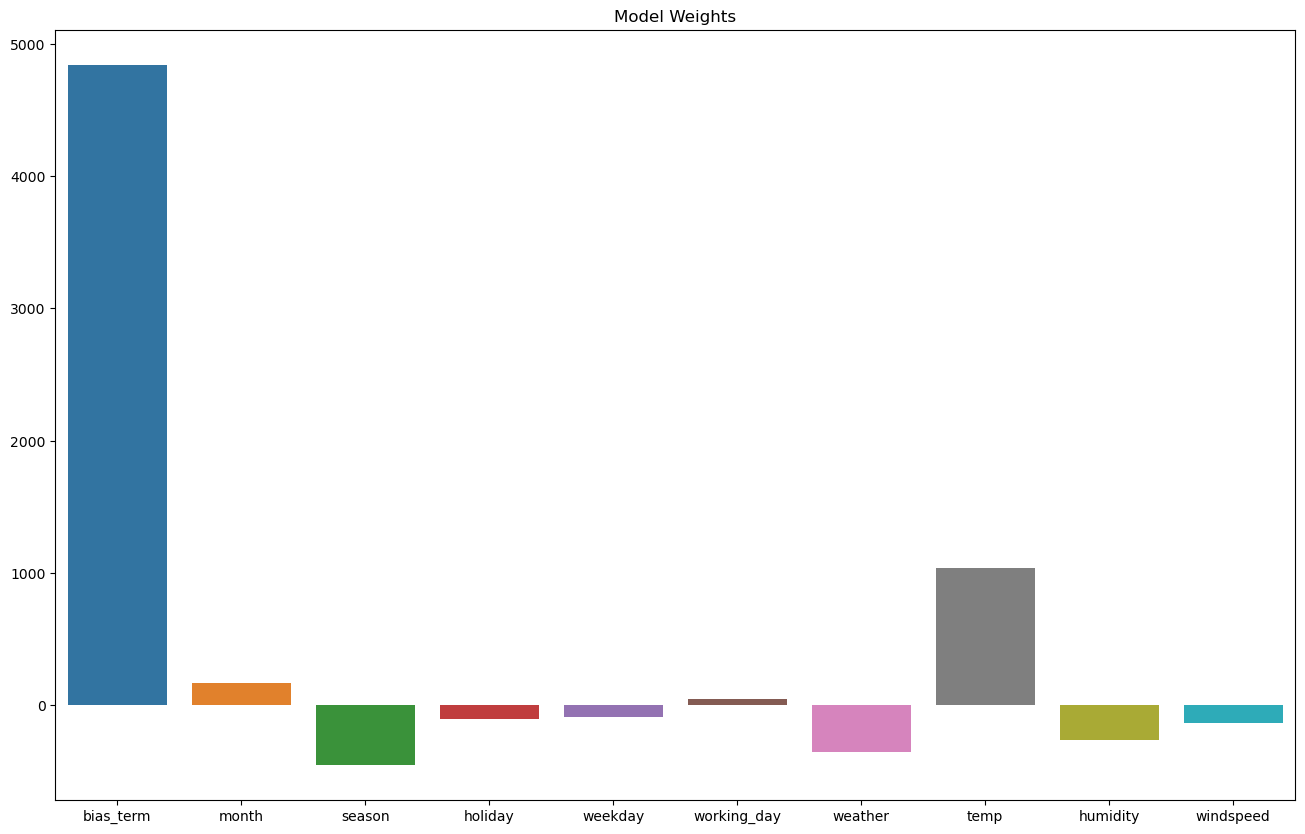

In [23]:
### Code here
feature_names =['bias_term']+list(bike_rental_X.columns)
coefs = linear_model.w
fig = plt.figure(figsize=(16,10))
ax = sns.barplot(x=feature_names, y=coefs)
plt.title('Model Weights')

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

In [24]:
### Comment here
## According to the model, it appears that season, weather, temp are the greatest contributors to the car price, 
## where temp is positively contributing to the price; season, weather, and humidity are negatively impacted the price. 

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

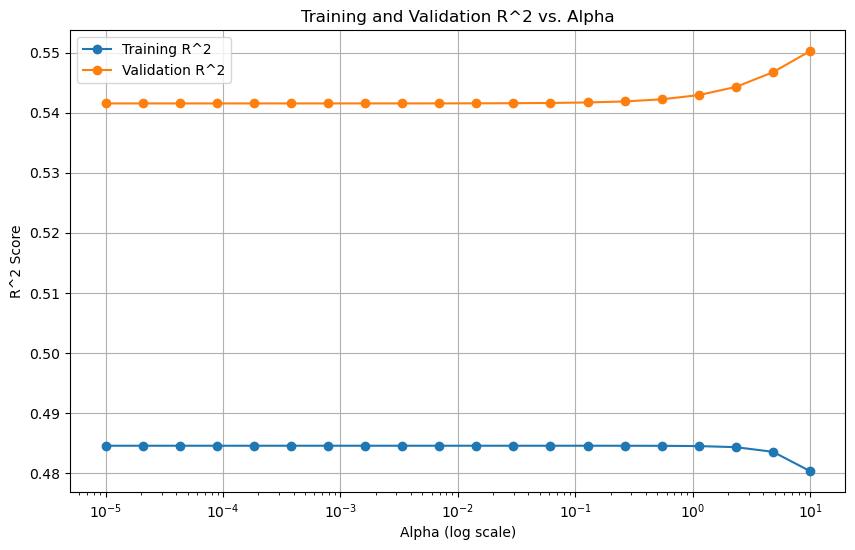

In [25]:
### Code here
train_r2_scores = []
val_r2_scores = []

alphas = np.logspace(-5,1,20)
for alpha in alphas:
    # Create and train the LinearRegression model with the current alpha
    tune_model = LinearRegression(alpha=alpha)
    tune_model.train(X_train, bike_rental_y_train)
    
    # Make predictions on the training and validation sets
    y_train_pred = tune_model.predict(X_train)
    y_val_pred = tune_model.predict(X_val)

    # Calculate and store the R^2 scores
    train_r2 = r2_score(bike_rental_y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_r2_scores, label='Training R^2', marker='o')
plt.semilogx(alphas, val_r2_scores, label='Validation R^2', marker='o')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R^2 Score')
plt.title('Training and Validation R^2 vs. Alpha')
plt.legend()
plt.grid(True)


**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [26]:
### Comment here

## As the model complexity decreases, the training R^2 score goes down while the validation score goes up.
## This is because the lower complexity fails to capture detailed patterns in the training data and hence lead to underfitting, 
## hence decreases the training R^2 value.
## When the model is less likely to overfit the training data, it might have better performance when generalize on the new dataset,
## so the validation R^2 value goes up.


### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [27]:
### Code here
loan_df = pd.read_csv('/Users/youjia/Desktop/AML-github/aml-fall2023-assignment1-JessicaYoujiaLi/Data/loan_data.csv')
loan_df = loan_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [28]:
### Code here
nan_count = loan_df.isna().sum()
loan_df.dropna(inplace=True)

In [29]:
### Comment here
#There are plenty missing values in the dataset, and there are plenty approaches to consider in handling them. 
#A way to consider is to filling the missing values with the mean or the mode value. However, it is possible to change the distribution of the 
#feature if it is categorical variable when the number of missing values are too high.
#so the best way might be dropping out the missing values. 

**2.2.3 Encode the categorical variables.**

In [30]:
### Code here
encoder = OneHotEncoder()
loan_df = pd.get_dummies(loan_df, drop_first=True)

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [31]:
### Code here
label_counts = loan_df['Loan_Status_Y'].value_counts()
category_probabilities = label_counts / label_counts.sum()
print(category_probabilities)

1    0.691667
0    0.308333
Name: Loan_Status_Y, dtype: float64


In [32]:
### Comment here
#This isn't a balanced distribution because the probability of categority of label being 1 is about 68%, which is distinctvely higher than 
#the amount of label being 0, which is about 31%.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

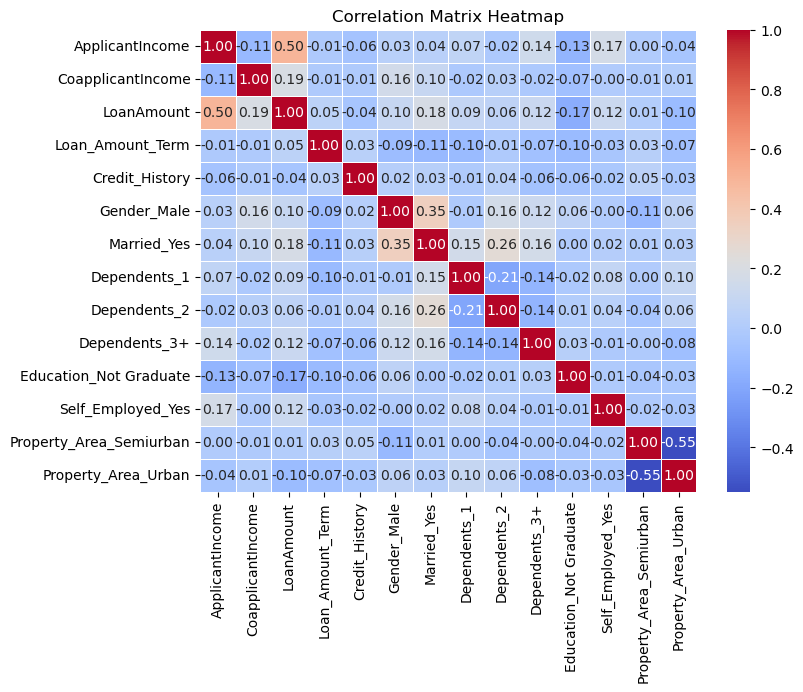

In [33]:
### Code here

# split data into features and labels
loan_X = loan_df.drop(columns=['Loan_Status_Y'])
loan_y = loan_df['Loan_Status_Y']

correlation_matrix = loan_X .corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [34]:
### Code here

#Convert to a Numpy vector 
y_vector = loan_y.to_numpy().reshape(-1,1)
loan_vector_y_vector = pd.DataFrame(y_vector, columns=['Loan_Status_Y'])

#Spliting the dataset
X_train, X_dev, y_train, y_dev, = train_test_split(loan_X,loan_vector_y_vector ,test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

#Standarize Columns
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#Add column of ones
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [35]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

Text(0.5, 1.0, ' Losses v.s Epochs')

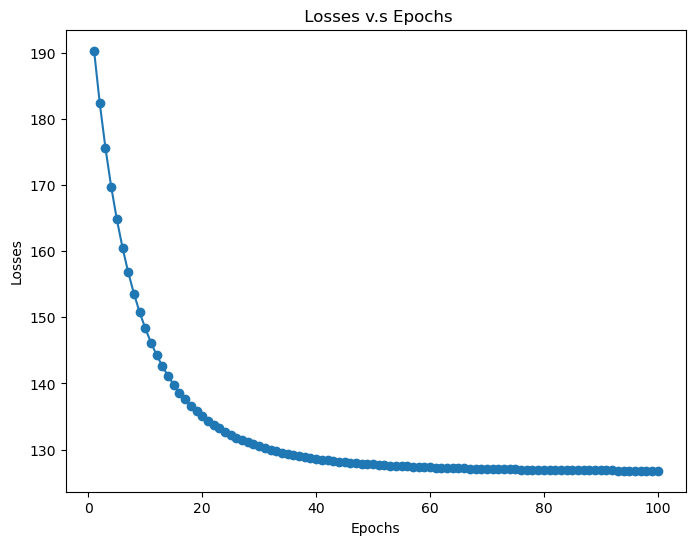

In [36]:
### Code here

#training logistic regression model
logreg_model = LogisticRegression(alpha=0,t=100,eta=1e-3)
losses = logreg_model.train(X_train,y_train)
loan_y_pred = logreg_model.predict(X_train)
#plot training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(np.squeeze(losses)) + 1), np.squeeze(losses), marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title(' Losses v.s Epochs')

In [37]:
### Code here 

from sklearn.metrics import accuracy_score

best_hyperparameters = None
best_accuracy = 0
num_iterations = 20

for _ in range(num_iterations):
    # Randomly sample hyperparameters
    alpha = np.random.uniform(0, 1)
    eta = np.random.uniform(0, 0.001)
    t = np.random.randint(0, 100)

    # Initialize and train the model with the sampled hyperparameters
    model = LogisticRegression(alpha=alpha, eta=eta, t=t)
    model.train(X_train,y_train)
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_pred,y_train)

    if accuracy > best_accuracy:
        best_hyperparameters = {
            'alpha': alpha,
            'eta': eta,
            't': t
        }
        best_accuracy = accuracy 

print("Best Hyperparameters:")
print(best_hyperparameters)

tuned_logreg_model = LogisticRegression(alpha=alpha, eta=eta, t=t)
print(f"Iteration {_ + 1}/{num_iterations}: best_accuracy = {best_accuracy:.4f}, Alpha = {alpha:.4f}, Eta = {eta:.4f}, t = {t}")

Best Hyperparameters:
{'alpha': 0.5311836078561102, 'eta': 0.0009797887957708406, 't': 94}
Iteration 20/20: best_accuracy = 0.8229, Alpha = 0.8332, Eta = 0.0003, t = 9


In [38]:
### Code here
accuracy_1 = accuracy_score(loan_y_pred, y_train.values) 
print('accuracy score for the trained model:',accuracy_1)

tuned_logreg_model.train(X_train,y_train)
tuned_y_pred = tuned_logreg_model.predict(X_train)
accuracy_2 = accuracy_score(tuned_y_pred, y_train.values) 
print('accuracy score for the fine-tuned model:',accuracy_2)

accuracy score for the trained model: 0.8229166666666666
accuracy score for the fine-tuned model: 0.8159722222222222


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

Text(0.5, 1.0, 'Model Weights')

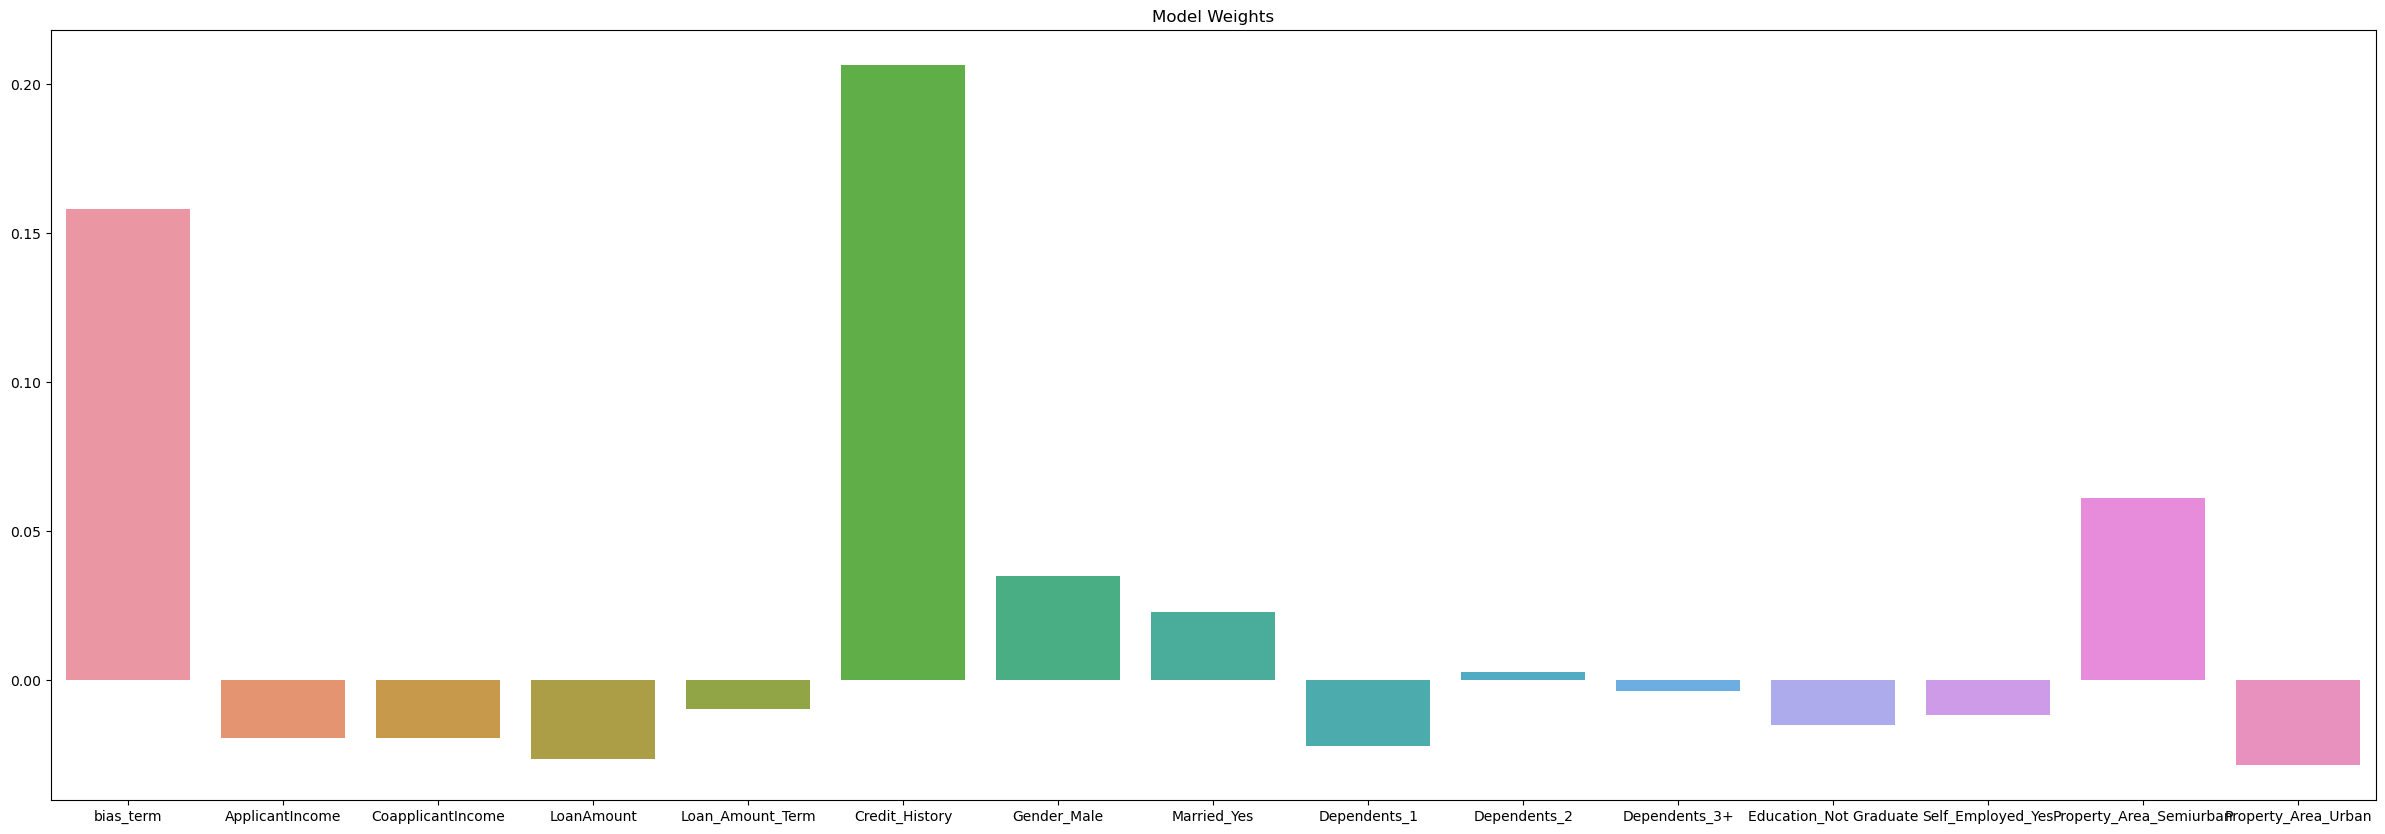

In [43]:
### Code here

feature_names =['bias_term']+list(loan_X.columns)
coefs = tuned_logreg_model.w
fig = plt.figure(figsize=(30,10))
ax = sns.barplot(x=feature_names, y=coefs.flatten())
plt.title('Model Weights')


In [40]:
### Comment here
## Based on the trained model, we can see that the credit history, gender_male, and property_area_semiurban are the greatest contributors to 
## to the loan status, where the credit history is the most impactful when it comes to decide the loan status.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [41]:
### Code here

# Train a primal SVM (LinearSVC) with default parameters.
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on training, validation, and test sets.
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the three sets.
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies.
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8229
Validation Accuracy: 0.8229
Test Accuracy: 0.7708


/Users/youjia/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/youjia/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/youjia/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [42]:
### Code here
# Train a dual SVM (SVC) with default parameters.
clf = SVC(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on training, validation, and test sets.
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the three sets.
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies.
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8403
Validation Accuracy: 0.8125
Test Accuracy: 0.7708


/Users/youjia/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
